In [203]:
%reload_ext autoreload
%autoreload 2

In [204]:
from river import datasets
from river import evaluate
from river import linear_model
from river import metrics
from river import optim
from river import preprocessing

dataset = datasets.Phishing()
optimizer = optim.SGD()

model = (
    preprocessing.StandardScaler() |
    linear_model.LogisticRegression(optimizer)
)
metric = metrics.F1()

evaluate.progressive_val_score(dataset, model, metric)

F1: 87.97%

In [289]:
from src.models.func import CustomFunc
import matplotlib.pyplot as plt
import seaborn as sns
from src.optim.ftpl import FTPL
from src.optim.ftrl import FTRL

f(0.002) = 1.3219765223154227
f(0.002841249458149464) = 1.7483855851453034
f(0.005823192872874239) = 1.121249017876829
f(0.008381195044928222) = 0.1309225732669823
f(0.006748807507661445) = -0.3503000948679559
f(0.0008850029502744504) = -0.13319079342448578
f(-0.004368355907950852) = -0.3507641451562813
f(-0.00435961919613495) = -0.7567834890283929
f(-0.0043508999577426795) = -0.9775111873346547
f(-0.004342198157827194) = -0.9589054199782966
f(-0.00433351376151154) = -0.7055215462288708
f(-0.004324846733988517) = -0.2793967938996534
f(-0.00431619704052054) = 0.21513861764470812
f(-0.004307564646439498) = 0.6570051538319723
f(-0.00429894951714662) = 0.9380184577416899
f(-0.004290351618112326) = 0.9893766537403889
f(-0.004281770914876101) = 0.7985054461856578
f(-0.004273207373046348) = 0.41213674554300966
f(-0.004264660958300256) = -0.07513293312872005
f(-0.004256131636383656) = -0.5440029962328635
f(-0.004247619373110888) = -0.8796777177013312
f(-0.0042391241343646665) = -0.999972236377

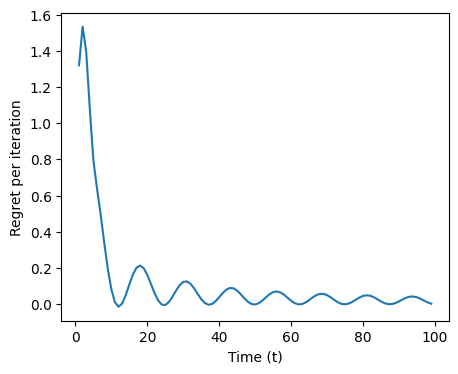

In [296]:
optimizer = FTPL(gamma=0)
w_init = -1
model = CustomFunc(optimizer=optimizer, w=w_init)
regret = 0
regret_per_iter_list = []

t_values = range(1,100)

for t in t_values:
    model.learn_one(x={'t':t})
    w = model._weights['w']
    fw = model.predict_one({'w': w, 't': t})

    print(f'f({w}) = {fw}')
    regret += fw
    regret_per_iter_list.append(regret/t)
print(f'Regret: {regret}')
# print(f'f({w}) = {fw}')

plt.figure(figsize=(5, 4))
plt.plot(t_values, regret_per_iter_list)
plt.xlabel('Time (t)')
plt.ylabel('Regret per iteration')
plt.show()


In [285]:
import numpy as np

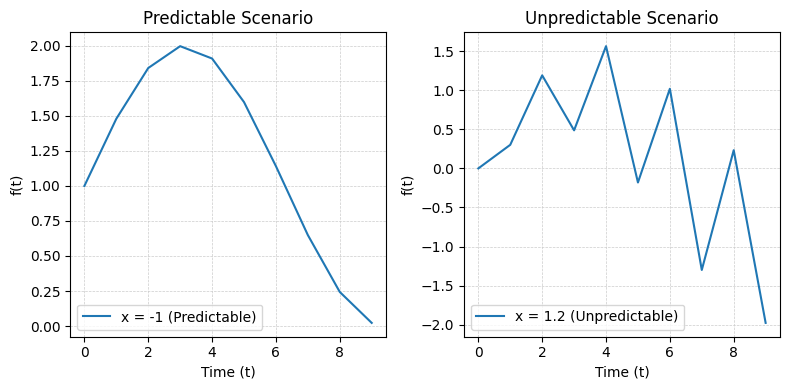

In [120]:
# Instantiate the CustomFunc class
model = CustomFunc(optimizer=optimizer)
w_predictable = -1
w_unpredictable = 1.2
t_values = range(10)

# Generate data using the class
f_values_predictable = [model.predict_one({'w': w_predictable, 't': t}) for t in t_values]
f_values_unpredictable = [model.predict_one({'x': w_unpredictable, 't': t}) for t in t_values]

# Plotting the results
plt.figure(figsize=(8, 4))

plt.style.use('default')

# Set the linewidth and grid appearance
line_width = 1.5
grid_color = '#cccccc'  # Light grey grid lines

# Plotting the predictable data
plt.subplot(1, 2, 1)
plt.plot(t_values, f_values_predictable, label=f"x = {w_predictable} (Predictable)", linewidth=line_width)
plt.grid(True, linestyle='--', linewidth=0.5, color=grid_color)
plt.xlabel('Time (t)')
plt.ylabel('f(t)')
plt.title('Predictable Scenario')
plt.legend()

# Plotting the unpredictable data
plt.subplot(1, 2, 2)
plt.plot(t_values, f_values_unpredictable, label=f"x = {w_unpredictable} (Unpredictable)", linewidth=line_width)
plt.grid(True, linestyle='--', linewidth=0.5, color=grid_color)
plt.xlabel('Time (t)')
plt.ylabel('f(t)')
plt.title('Unpredictable Scenario')
plt.legend()

plt.tight_layout()
plt.show()

In [242]:
optimizer.cumulative_loss

defaultdict(float, {'w': 241.0989574316902})